In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(1234567890)
n_estimators=100

df = pd.read_csv('titanic.csv')

In [69]:
#переводим категориальные признаки в бинарные
df = df.join(pd.get_dummies(df['sex'], prefix = 'sex',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['embarked'], prefix = 'embarked',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['class'], prefix = 'class',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['who'], prefix = 'who',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['deck'], prefix = 'deck',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['embark_town'], prefix = 'embark_town',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['adult_male'], prefix = 'eadult_male',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['alive'], prefix = 'alive',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['alone'], prefix = 'alone',  prefix_sep='_'), how = 'outer')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,eadult_male_False,eadult_male_True,alive_no,alive_yes,alone_False,alone_True
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,0,0,0,1,0,1,1,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,1,0,0,1,0,0,1,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,0,0,0,1,1,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0,0,0,1,1,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,0,0,0,1,0,1,1,0,0,1


In [70]:
#удаляем столбцы с категориальными признаками
df = df.drop(['sex'],1)
df = df.drop(['embarked'],1)
df = df.drop(['class'],1)
df = df.drop(['who'],1)
df = df.drop(['deck'],1)
df = df.drop(['embark_town'],1)
df = df.drop(['alive'],1)
df = df.drop(['alone'],1)
df = df.drop(['adult_male'],1)

In [71]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,...,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,eadult_male_False,eadult_male_True,alive_no,alive_yes,alone_False,alone_True
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,1,0,1,1,0,0,1


In [72]:
variables = ['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'eadult_male_False', 'eadult_male_True',
       'alone_False', 'alone_True', 'fare']
for variable in variables:
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
subset = df[variables].dropna()
print(subset.shape)

(714, 30)


In [73]:
subset['survived'] = df['survived'].astype('category')
predictors = subset[variables]
targets = subset['survived']

In [74]:
training_data, test_data, training_target, test_target  = train_test_split(predictors, targets, test_size=.4)

In [75]:
classifier=RandomForestClassifier(n_estimators=n_estimators)
classifier=classifier.fit(training_data,training_target)

predictions=classifier.predict(test_data)

print('Classification Report')
print(sk.metrics.classification_report(test_target, predictions))

Classification Report
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       170
          1       0.80      0.68      0.73       116

avg / total       0.80      0.80      0.80       286



In [76]:
print('Confusion Matrix')
print(sk.metrics.confusion_matrix(test_target, predictions))

Confusion Matrix
[[150  20]
 [ 37  79]]


In [77]:
model = ExtraTreesClassifier()
model.fit(training_data,training_target)
feature_name = list(predictors.columns.values)
feature_importance = list(model.feature_importances_)
features = pd.DataFrame({'name':feature_name, 'importance':feature_importance}).sort_values(by='importance', ascending=False)
print(features.head(len(feature_name)))

    importance                     name
29    0.188018                     fare
1     0.170906                      age
25    0.103747        eadult_male_False
0     0.081521                   pclass
5     0.069944                 sex_male
13    0.061715                  who_man
2     0.041266                    sibsp
4     0.034748               sex_female
26    0.031052         eadult_male_True
10    0.030208             class_Second
9     0.029812              class_First
11    0.027569              class_Third
3     0.023568                    parch
19    0.021065                   deck_E
17    0.009050                   deck_C
15    0.008027                   deck_A
6     0.007695               embarked_C
27    0.006861              alone_False
16    0.006641                   deck_B
18    0.006220                   deck_D
8     0.006008               embarked_S
22    0.005446    embark_town_Cherbourg
28    0.005437               alone_True
21    0.005158                   deck_G


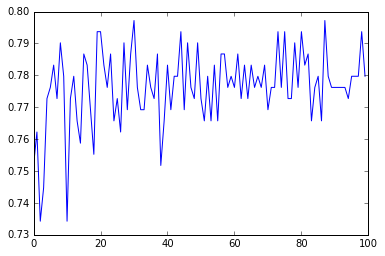

In [78]:
trees = range(n_estimators)
accuracy = np.zeros(n_estimators)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(training_data,training_target)
    predictions=classifier.predict(test_data)
    accuracy[idx] = sk.metrics.accuracy_score(test_target, predictions)
    
plt.cla()
plt.plot(trees, accuracy)